# Accessing camera readings for processing

1) Load Intel Realsense camera stream

In [17]:
## License: Apache 2.0. See LICENSE file in root directory.
## Copyright(c) 2015-2017 Intel Corporation. All Rights Reserved.

###############################################
##      Open CV and Numpy integration        ##
###############################################

import pyrealsense2 as rs
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()
device_product_line = str(device.get_info(rs.camera_info.product_line))

found_rgb = False
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        found_rgb = True
        break
if not found_rgb:
    print("The demo requires Depth camera with Color sensor")
    exit(0)

config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)

if device_product_line == 'L500':
    config.enable_stream(rs.stream.color, 960, 540, rs.format.bgr8, 30)
else:
    config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

try:
    for i in np.arange(1,10):

        # Wait for a coherent pair of frames: depth and color
        frames = pipeline.wait_for_frames()
        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()
        if not depth_frame or not color_frame:
            continue

        # Convert images to numpy arrays
        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())

        # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
        depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

        depth_colormap_dim = depth_colormap.shape
        color_colormap_dim = color_image.shape

        # If depth and color resolutions are different, resize color image to match depth image for display
        if depth_colormap_dim != color_colormap_dim:
            resized_color_image = cv2.resize(color_image, dsize=(depth_colormap_dim[1], depth_colormap_dim[0]), interpolation=cv2.INTER_AREA)
            images = np.hstack((resized_color_image, depth_colormap))
        else:
            images = np.hstack((color_image, depth_colormap))

        # Show images
        cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
        cv2.imshow('RealSense', images)
        cv2.waitKey(1)

finally:

    # Stop streaming
    pipeline.stop()

RuntimeError: No device connected

In [30]:
img = plt.imread('woodblocks.jpg')

Edit Images

(4000, 3000, 3)


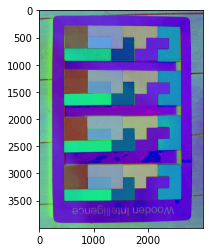

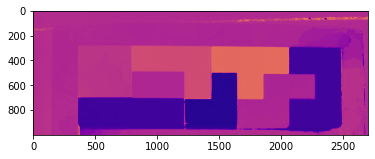

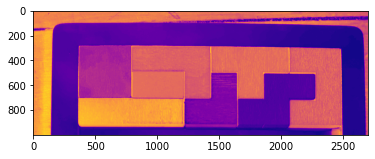

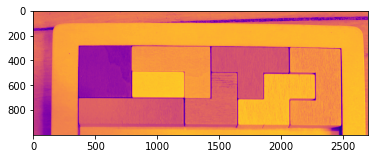

(4000, 3000, 3)


In [72]:
#img = color_image
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(np.shape(hsv))
plt.imshow(hsv, cmap='plasma')
plt.show()
plt.imshow(hsv[0:1000,100:2800,0], vmin = 0, vmax = 255, cmap='plasma')
plt.show()
plt.imshow(hsv[0:1000,100:2800,1], vmin = 0, vmax = 255, cmap='plasma')
plt.show()
plt.imshow(hsv[0:1000,100:2800,2], vmin = 0, vmax = 255, cmap='plasma')
plt.show()

s = np.shape(img)
print(s)

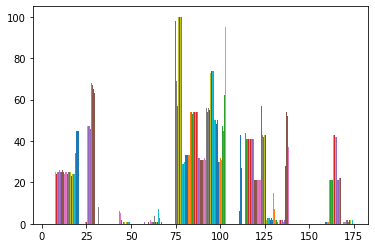

In [76]:
H = hsv[0:1000:10,100:2800:10,0]
S = hsv[0:1000:10,100:2800:10,1]
V = hsv[0:1000:10,100:2800:10,2]

plt.hist(H, bins = 5)
plt.show()



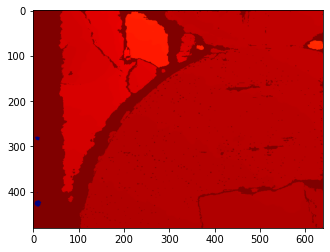

In [77]:
plt.imshow(depth_colormap)
plt.show()